In [29]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, Aer
import random
import networkx as nx
import matplotlib.pyplot as plt
import arviz as az
import random


In [30]:
#--------------------------Fig. 4-----------------------

In [40]:
#--------------------------Fig. 4: Data-----------------------------

fliptimes=1
n_traits=1
J=0.03

Props_list= [3,50]
Grover_list=[2,7]


display_traj_list=[]
avg_list=[1,2,3,4,5,6,7,8,9,10]
# Props_list= [1,3,5,10,30,50]:
for n_Props in Props_list:
    mean_traj_list=np.zeros((8000),dtype=int)
    for rerun in avg_list:
        file_path='logprob_'+'Barker_flips='+str(fliptimes)+'_P='+str(n_Props)+'_J='+str(J)+'_m='+str(n_traits)+"_mean5_no"+str(rerun)+'.txt'
        logprob_traj=[]
        with open(file_path, 'r') as file:
            for line in file:
                cleaned_line = (line.strip()).split(' ') # Remove newline characters
                logprob_traj.append(int(cleaned_line[0]))
        
        mean_traj_list+= np.array(logprob_traj)
            
    display_traj_list.append(mean_traj_list/len(avg_list))    
    
display_traj_list_classical=[]
for i in range(len(Props_list)): 
    display_traj_list_classical.append([])
    for trace in range(len(display_traj_list[i])):
        for repeat in range(Props_list[i]+1):
            display_traj_list_classical[i].append(display_traj_list[i][trace])
            
display_traj_list_grover=[]
for i in range(len(Props_list)): 
    display_traj_list_grover.append([])
    for trace in range(len(display_traj_list[i])):
        for repeat in range(Grover_list[i]):
            display_traj_list_grover[i].append(display_traj_list[i][trace])
            
            

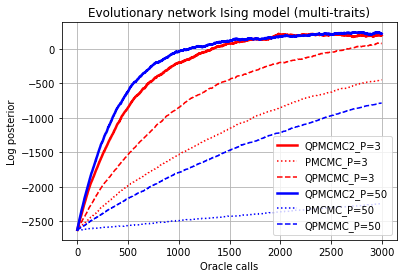

In [41]:
#------------------------------Generates Fig. 4: Display-----------------------------

display_niter=3000

iter_index=[]
for i in range(display_niter):
    iter_index.append(i)

# style_list=[,'--', '-']    
# color_list=['coral','red']
# color_list_r=['mediumseagreen','darkgreen']
color_list=['r','b']
    
for i in range(len(Props_list)): 
    plt.plot(iter_index[:display_niter], display_traj_list[i][:display_niter], color=color_list[i],linestyle="-", label='QPMCMC2_P='+str(Props_list[i]), linewidth=2.5)  
    plt.plot(iter_index[:display_niter], display_traj_list_classical[i][:display_niter], color=color_list[i],linestyle=':', label='PMCMC_P='+str(Props_list[i]),  linewidth=1.5)  
    plt.plot(iter_index[:display_niter], display_traj_list_grover[i][:display_niter],color=color_list[i],linestyle='--', label='QPMCMC_P='+str(Props_list[i]),  linewidth=1.5)  
    
# plt.plot(iter_index[:display_niter], mean_traj_MH[:display_niter], label='Metropolis-Hastings')  
        
plt.xlabel(r'Oracle calls')
plt.ylabel(r'Log posterior')
plt.title(r"Evolutionary network Ising model (multi-traits)")
plt.legend(loc="best", fontsize=10)
plt.grid()
plt.savefig("Different_MCMC", dpi=200)

In [33]:
#--------------------------Fig. 5 (single trait)-----------------------

In [34]:
#------------------------Fig. 5 (single trait): Data-----------------------------

fliptimes=1
n_traits=1
J=0.03

Props_list= [1,3,5,50]



display_traj_list=[]
avg_list=[1,2,3,4,5,6,7,8,9,10]
for n_Props in Props_list:
    mean_traj_list=np.zeros((8000),dtype=int)
    for rerun in avg_list:
        file_path='logprob_'+'Barker_flips='+str(fliptimes)+'_P='+str(n_Props)+'_J='+str(J)+'_m='+str(n_traits)+"_mean5_no"+str(rerun)+'.txt'
        logprob_traj=[]
        with open(file_path, 'r') as file:
            for line in file:
                cleaned_line = (line.strip()).split(' ') # Remove newline characters
                logprob_traj.append(int(cleaned_line[0]))
        
        mean_traj_list+= np.array(logprob_traj)
            
    display_traj_list.append(mean_traj_list/len(avg_list))    
    
display_traj_list_classical=[]
for i in range(len(Props_list)): 
    display_traj_list_classical.append([])
    for trace in range(len(display_traj_list[i])):
        for repeat in range(Props_list[i]):
            display_traj_list_classical[i].append(display_traj_list[i][trace])
    
# ----------------------------------------------------------------  
mean_traj_MH=np.zeros((8000),dtype=int)
for rerun in avg_list:
    file_path='logprob_'+'MetropolisHastings_flips='+str(fliptimes)+'_J='+str(J)+'_m='+str(n_traits)+"_mean5_no"+str(rerun)+'.txt'
    logprob_traj=[]
    with open(file_path, 'r') as file:
        for line in file:
            cleaned_line = (line.strip()).split(' ') # Remove newline characters
            logprob_traj.append(int(cleaned_line[0]))

    mean_traj_MH+= np.array(logprob_traj) 
    
mean_traj_MH=mean_traj_MH/len(avg_list)

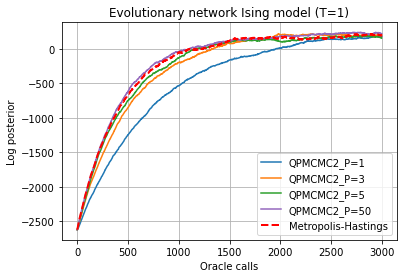

In [35]:
#-----------------------Fig. 5 (single trait): Display-----------------------------


display_niter=3000

color_list=['#1f77b4','#ff7f0e','#2ca02c','#9467bd']
iter_index=[]
for i in range(display_niter):
    iter_index.append(i)
    
for i in range(len(Props_list)): 
    plt.plot(iter_index[:display_niter], display_traj_list[i][:display_niter], linewidth=1.5, color=color_list[i], label='QPMCMC2_P='+str(Props_list[i]))  
    
plt.plot(iter_index[:display_niter], mean_traj_MH[:display_niter],color='red', linewidth=2,linestyle='--', label='Metropolis-Hastings')  
        
plt.xlabel(r'Oracle calls')
plt.ylabel(r'Log posterior')
plt.title(r"Evolutionary network Ising model (T=1)")
plt.legend()
plt.grid()
plt.savefig("Different_P_Comparison_M=1", dpi=200)

In [36]:
# ---------------------Fig. 5 (Multitraits)-----------------------------

In [45]:
# ---------------------Fig. 5 (Multitraits): Data-----------------------------
fliptimes=1
n_traits=4
J=0.03

Props_list= [1,3,5,50]

display_traj_list=[]
avg_list=[1,2,3,4,5,6,7,8,9,10]
for n_Props in Props_list:
    mean_traj_list=np.zeros((8000),dtype=int)
    for rerun in avg_list:
        file_path='logprob_'+'Barker_flips='+str(fliptimes)+'_P='+str(n_Props)+'_J='+str(J)+'_m='+str(n_traits)+"_mean_no"+str(rerun)+'.txt'
        logprob_traj=[]
        with open(file_path, 'r') as file:
            for line in file:
                cleaned_line = (line.strip()).split(' ') # Remove newline characters
                logprob_traj.append(int(cleaned_line[0]))
        
        mean_traj_list+= np.array(logprob_traj)
            
    display_traj_list.append(mean_traj_list/len(avg_list))    
    
display_traj_list_classical=[]
for i in range(len(Props_list)): 
    display_traj_list_classical.append([])
    for trace in range(len(display_traj_list[i])):
        for repeat in range(Props_list[i]):
            display_traj_list_classical[i].append(display_traj_list[i][trace])
    
# ----------------------------------------------------------------  
mean_traj_MH=np.zeros((8000),dtype=int)
for rerun in avg_list:
    file_path='logprob_'+'MetropolisHastings_flips='+str(fliptimes)+'_J='+str(J)+'_m='+str(n_traits)+"_mean_no"+str(rerun)+'.txt'
    logprob_traj=[]
    with open(file_path, 'r') as file:
        for line in file:
            cleaned_line = (line.strip()).split(' ') # Remove newline characters
            logprob_traj.append(int(cleaned_line[0]))

    mean_traj_MH+= np.array(logprob_traj) 
    
mean_traj_MH=mean_traj_MH/len(avg_list)

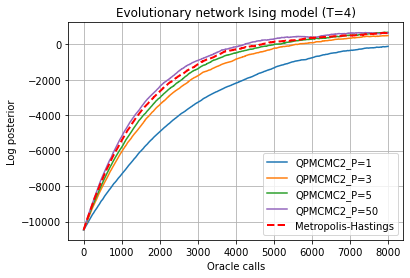

In [51]:
# ---------------------Fig. 5 (Multitraits): Display-----------------------------

display_niter=8000

color_list=['#1f77b4','#ff7f0e','#2ca02c','#9467bd']
iter_index=[]
for i in range(display_niter):
    iter_index.append(i)
    
for i in range(len(Props_list)): 
    plt.plot(iter_index[:display_niter], display_traj_list[i][:display_niter], linewidth=1.5, color=color_list[i], label='QPMCMC2_P='+str(Props_list[i]))  
    
plt.plot(iter_index[:display_niter], mean_traj_MH[:display_niter],color='red', linewidth=2,linestyle='--', label='Metropolis-Hastings')  
        
plt.xlabel(r'Oracle calls')
plt.ylabel(r'Log posterior')
plt.title(r"Evolutionary network Ising model (T=4)")
plt.legend()
plt.grid()
plt.savefig("Different_P_Comparison_M=4", dpi=100)